<IPython.core.display.Javascript object>

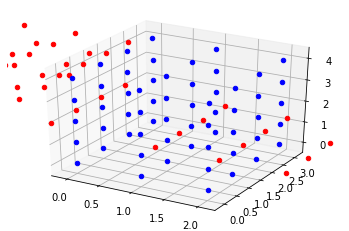

In [11]:
from vpython import *
import random
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

scene = canvas(title = "Earthquake Simulator", forward=vector(0,1,0), up=vector(0,0,1))

# IMPORTANT: distance_between must be multiple of length, width, height
# ALSO: length, width, height, and distance_between must be positive integers
length = 2
width = 3
height = 4
distance_between = 1

point_mass = 1 
k = 1

scene.center = vector(length/2, width/2, height/2)

class building:
    def __init__(self, length, width, height, distance_between):
        self.points = []
        self.connections = []
        
        ground = box(pos=vector(length/2, width/2, 0), length=length*5, width=.01, height=width*5, color=color.green)
        
        # make point masses
        for x_unit in range(0, length + distance_between, distance_between):
            for y_unit in range(0, width + distance_between, distance_between):
                for z_unit in range(0, height + distance_between, distance_between):
                    point = sphere(pos=vector(x_unit, y_unit, z_unit), radius=(distance_between / 3), color=color.blue)
                    point.mom = vector(0,0,0)
                    point.index = len(self.points)
                    point.color_r = random.uniform(0,1)
                    point.color_g = random.uniform(0,1)
                    point.color_b = random.uniform(0,1)
                    self.points.append(point)
        
        # make springs                
        for point in self.points:
            if point.pos.z != height:
                spring = self.make_spring(point, self.points[point.index+1])
            if point.pos.y != width:
                self.make_spring(point, self.points[point.index + (height+1)])
            if point.pos.x != length:
                self.make_spring(point, self.points[point.index + (width+1) * (height+1)])

    # member function for making springs
    def make_spring(self, start, end):
        spring = helix()
        spring.pos = start.pos
        spring.axis = end.pos-start.pos
        spring.thickness = 0.05
        spring.radius = 0.2*distance_between
        spring.length = distance_between
        spring.start = start
        spring.end = end
        spring.color = color.white
        self.connections.append(spring)
        

def earthquake(building):
    multiplier_x = random.uniform(-.014, .014)
    multiplier_y = random.uniform(-.014, .014)
    multiplier_z = random.uniform(-.005, .005)
    multiplied = vector(multiplier_x, multiplier_y, 0)
    
    for point in building.points:
        if point.pos.z == 0:
            point.pos += multiplied
            
        
skyscraper = building(length, width, height, distance_between)
# skyscraper.points[1].pos -= vector(0, .1, 0) # cool test

# graph axes
ax = plt.axes(projection='3d')
for point in skyscraper.points:
    ax.scatter3D(point.pos.x, point.pos.y, point.pos.z, c='blue')
ax.set_xlim([-.1*length, 1.1*length])
ax.set_ylim([-.1*width, 1.1*width])
ax.set_zlim([-.1*height, 1.1*height])
    
time = 0
dt = 1e-3


while time < 5e-1:
    rate(100)
   # print(skyscraper.points[1].pos)

    earthquake(skyscraper)
    time += dt
    
    for point in skyscraper.points:
        if point.pos.z != 0:
            point.pos += point.mom/point_mass * dt
        if point.pos.z < 0:
            point.pos.z = 0
        
    for spring in skyscraper.connections:
        spring.axis = spring.end.pos - spring.start.pos
        L = mag(spring.axis)
        spring.pos = spring.start.pos + 0.2*distance_between*spring.axis.norm()
        Ls = L - distance_between / 5
        spring.length = Ls
        Fdt = spring.axis.norm() * (k * (1 - distance_between/L))
        spring.start.mom = spring.start.mom + Fdt
        spring.end.mom = spring.end.mom - Fdt

for point in skyscraper.points:
    ax.scatter3D(point.pos.x, point.pos.y, point.pos.z, c='red')

#Margaret Rudnick
